# Fraude en Transacciones Financieras

[![Banner.png](https://i.postimg.cc/C1t2SCwf/Banner.png)](https://postimg.cc/FdypxLd9)

## Introducción

Este notebook se enfoca en la extracción, transformación y carga (ETL) de datos de transacciones financieras para prepararlos para el análisis posterior. 

**Las tareas principales incluyen:**

Extracción: Obtener datos de una fuente externa, como una base de datos o API.
Transformación: Limpiar, formatear y transformar los datos para que sean consistentes y adecuados para el análisis.
Carga: Almacenar los datos transformados en un formato adecuado para su posterior análisis, como una base de datos o un archivo CSV.
Objetivos:

Preparar un conjunto de datos limpio y consistente para el análisis de fraude en transacciones financieras.
Garantizar la calidad y confiabilidad de los datos para obtener resultados precisos en el análisis.
Facilitar el acceso y la manipulación de los datos para futuros análisis.

### Instalaremos paquetes y librerías necesarias para descargar, trabajar los DataSets para cumplir con nuestro MVP descrito en nuestro README.md

In [31]:
# Importo librerías y paquetes necesarios
import numpy as np
import pandas as pd
import zipfile
import os
import json
import requests
import ssl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Importo funciones necesarias
from pandas import to_datetime
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.exceptions import InsecureRequestWarning
from requests.packages.urllib3.poolmanager import PoolManager

### Trato advertencias

In [2]:
# Deshabilito advertencias de solicitudes inseguras.
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

### Llamaré a los archivos con los que trabajaremos.

In [3]:
# Rutas a los archivos ZIP y el endpoint de la API
credit_card_zip_path = r"C:\\Users\Esteban García\\OneDrive\\Escritorio\\LABs\\Datasets para Trabajar NoCountry\\DataFrames\\Credit Card Transactions Fraud Detection Dataset.zip"
ecommerce_zip_path = r"C:\\Users\\Esteban García\\OneDrive\\Escritorio\\LABs\\Datasets para Trabajar NoCountry\\DataFrames\\Fraudulent E-commerce Transactions.zip"

# Endpoint de la API del BCRA (ajustar según la documentación)
bcra_api_url = "https://api.bcra.gob.ar/estadisticas/v2.0/PrincipalesVariables"

### Establezco la ruta donde guardaré los df y *.csv

In [4]:
output_dir = r"C:\\Users\\Esteban García\\OneDrive\\Escritorio\\LABs\\Datasets para Trabajar NoCountry\\DataFrames\\DF Procesados"

### Defino la función para explorar los documentos

In [5]:
# Función para explorar y analizar los archivos *.zip

def list_files_in_zip(zip_path):
    """Listo los archivos dentro de un archivo ZIP."""
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        return zip_ref.namelist()


def extract_and_read_zip(zip_path, file_name):
    """Extraigo los archivos ZIP y leo los datasets."""
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("temp_dataset")
        file_path = os.path.join("temp_dataset", file_name)
        return pd.read_csv(file_path)

### Verifico que la extracción de los archivos fue existosa.

In [6]:
# Verifico los nombres de los archivos dentro de los ZIPs
credit_card_files = list_files_in_zip(credit_card_zip_path)
ecommerce_files = list_files_in_zip(ecommerce_zip_path)

# Verifico la lectura correcta de los archivos
credit_card_file_name = next((file for file in credit_card_files if file.endswith('.csv')), None)
ecommerce_file_name = next((file for file in ecommerce_files if file.endswith('.csv')), None)

if credit_card_file_name:
    credit_card_df = extract_and_read_zip(credit_card_zip_path, credit_card_file_name)
else:
    print("No se encontró un archivo CSV en el ZIP de tarjetas de crédito.")

if ecommerce_file_name:
    ecommerce_df = extract_and_read_zip(ecommerce_zip_path, ecommerce_file_name)
else:
    print("No se encontró un archivo CSV en el ZIP de comercio electrónico.")

### Consulto la APIs del BCRA

In [7]:
# Determino la URL base de la API
base_url = "https://api.bcra.gob.ar/estadisticas/v2.0/"

# Establezco el endpoint para obtener principales variables
variables_url = base_url + "principalesvariables"

# Solicito los datos de principales variables
response = requests.get(variables_url, verify=False)
if response.status_code == 200:
    variables = response.json()['results']
else:
    print("Error al obtener principales variables:", response.status_code)

# Creo un DataFrame con las principales variables
bcra_df = pd.DataFrame(variables)

# Muestro las primeras filas del DataFrame
print(bcra_df.head())

# Guardar el DataFrame en un archivo CSV
output_dir = r"C:\\Users\\Esteban García\\OneDrive\\Escritorio\\LABs\\Datasets para Trabajar NoCountry\\DataFrames\\DF Procesados"
bcra_df.to_csv(output_dir + "principales_variables.csv", index=False)

# Función para obtener datos de una variable específica
def obtener_datos_variable(id_variable, desde, hasta):
    datos_url = f"{base_url}datosvariable/{id_variable}/{desde}/{hasta}"
    response = requests.get(datos_url, verify=False)
    if response.status_code == 200:
        return response.json()['results']
    else:
        print("Error al obtener datos de la variable:", response.status_code)
        return []

# Establezco el rango de fechas para el año 2024
id_variable = 1  # ID de la variable a consultar
desde = "2024-01-01"  # Fecha de inicio del rango
hasta = "2024-12-31"  # Fecha de fin del rango

datos_variable = obtener_datos_variable(id_variable, desde, hasta)

# Creo el DataFrame con los datos de la variable
bcra_df = pd.DataFrame(datos_variable)

# Mostrar las primeras filas del DataFrame de datos de la variable
print(bcra_df.head())

# Guardar el DataFrame en un archivo CSV
bcra_df.to_csv(output_dir + "datos_variable.csv", index=False)



   idVariable  cdSerie                                        descripcion  \
0           1      246  Reservas Internacionales del BCRA (en millones...   
1           4     7927  Tipo de Cambio Minorista ($ por USD) Comunicac...   
2           5      272  Tipo de Cambio Mayorista ($ por USD) Comunicac...   
3           6     7935             Tasa de Política Monetaria (en % n.a.)   
4           7     1222     BADLAR en pesos de bancos privados (en % n.a.)   

        fecha      valor  
0  2024-07-18  27607.000  
1  2024-07-22    966.230  
2  2024-07-22    927.080  
3  2024-07-22     40.000  
4  2024-07-19     37.875  
   idVariable       fecha    valor
0           1  2024-01-02  23470.0
1           1  2024-01-03  23677.0
2           1  2024-01-04  23835.0
3           1  2024-01-05  24119.0
4           1  2024-01-08  23233.0


### Visualizo los df para ver su contenido para tener un primer acercamiento al contenido, visualizarlo y entender los pasos a seguir.

In [ ]:
ecommerce_df

In [ ]:
credit_card_df

In [ ]:
bcra_df

### Al haber una reducción de personal a última hora, elegimos trabajar con el DataFrame llamado ecommerce_df

In [8]:
ecommerce_df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,2024-01-12 23:39:55,PayPal,health & beauty,2,29,North Laurafort,desktop,27.245.104.92,USNV Griffin\nFPO AA 52700,USNV Griffin\nFPO AA 52700,0,149,23
1472948,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,2024-03-27 04:31:45,credit card,clothing,2,32,Burnsville,tablet,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, GA 68797","478 John Square Apt. 235\nMillerhaven, GA 68797",0,132,4
1472949,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,2024-01-31 23:51:42,bank transfer,electronics,4,36,Garciafort,mobile,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, OH ...","182 House Island Suite 198\nEast Scott, FM 84301",0,98,23
1472950,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,2024-01-12 16:21:32,bank transfer,electronics,5,34,Lake Josephberg,desktop,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...","27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...",0,191,16


### Análisis exploratorio de fraudes en e-commerce_df

In [9]:
print(ecommerce_df.columns)

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')


In [10]:
# Verifique los tipos de datos en su DataFrame (opcional)
print(ecommerce_df.dtypes)  # Data Analyst: Comentar esta línea si ya conoces los tipos

Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object


### Procederemos a continuar con un análisis inicial y exploratorio para conocer un poco más de los datos contenidos.

In [11]:
# Verifico valores nulos en las columnas
valores_nulos = ecommerce_df.isna().sum()
print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


In [12]:
# Verifico valores atípicos (outliers) en 'Customer Age'
""" usaré describe para ver si hay valores atípicos"""
print("\nEstadísticas de 'Customer Age':")
print(ecommerce_df['Customer Age'].describe())


Estadísticas de 'Customer Age':
count    1.472952e+06
mean     3.451208e+01
std      1.000313e+01
min     -1.600000e+01
25%      2.800000e+01
50%      3.500000e+01
75%      4.100000e+01
max      8.600000e+01
Name: Customer Age, dtype: float64


Al analizar la salida de 'Customer Age' con describe, se ha identificado un valor atípico en la columna 'Customer Age'. Este outlier debe ser tratado antes de realizar análisis posteriores para obtener resultados más precisos y confiables.

### Vamos a visualizar los outliers saber ¿qué porcentaje representan? y eliminarlos para nuestro posterior trabajo de EDA.

In [16]:
# Obtengo el IQR
iqr = ecommerce_df['Customer Age'].quantile(0.75) - ecommerce_df['Customer Age'].quantile(0.25)

# Defino el límite superior e inferior
upper_bound = ecommerce_df['Customer Age'].quantile(0.75) + 1.5 * iqr
lower_bound = ecommerce_df['Customer Age'].quantile(0.25) - 1.5 * iqr

# Identifico outliers
outliers = ecommerce_df[(ecommerce_df['Customer Age'] > upper_bound) | (ecommerce_df['Customer Age'] < lower_bound)]


### Visualizo para entender dicha información

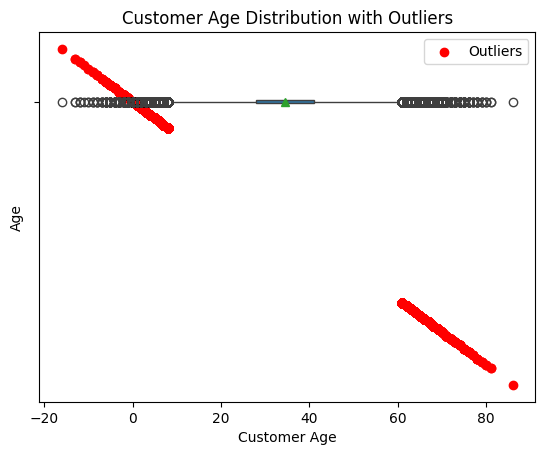

In [17]:
sns.boxplot(
    x = "Customer Age",
    showmeans=True,  # Show mean as a diamond
    data=ecommerce_df
)

# Highlight outliers with red points
plt.scatter(
    outliers['Customer Age'],  # x-coordinates of outliers
    outliers['Customer Age'],  # y-coordinates of outliers (same as x for points)
    color='red',
    label='Outliers'
)

# Add labels and title
plt.xlabel('Customer Age')
plt.ylabel('Age')
plt.title('Customer Age Distribution with Outliers')

# Show legend
plt.legend()

# Display the plot
plt.show()


### Determinaré el porcentaje de datos negativos.

In [19]:
# Identifico datos negativos en la columna edad
negative_ages = ecommerce_df[ecommerce_df['Customer Age'] < 0]

# Calculo el total
total_records = len(ecommerce_df)

# Calculo los negativos
negative_age_count = len(negative_ages)

# Calculo el porcentaje que representa sobre el total de la columna
negative_age_percentage = (negative_age_count / total_records) * 100

# Visualizo
print(f"Porcentaje de edades negativas: {negative_age_percentage:.2f}%")


Porcentaje de edades negativas: 0.02%


El ser un porcentaje muy bajo, no afectará la eliminación de los mismos.

In [20]:
# Procederé a eliminar los outliers o edades negativas ya que las mismas no existen.
ecommerce_df = ecommerce_df[ecommerce_df['Customer Age'] >= 0]

# Verifico la cantidad de registros restantes
print("Cantidad de registros restantes:", len(ecommerce_df))

Cantidad de registros restantes: 1472694


### Ahora procedo a graficar un histograma.

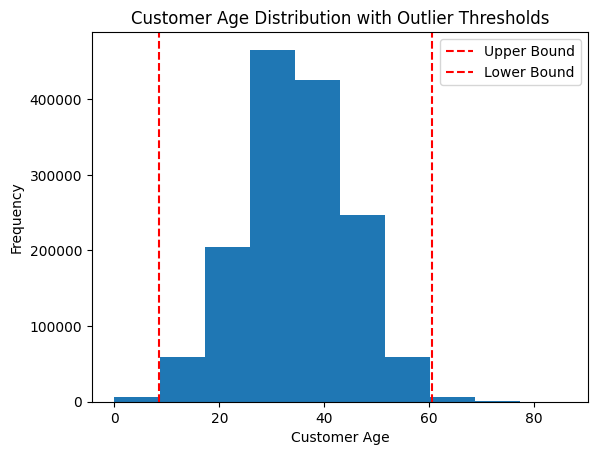

In [21]:
plt.hist(ecommerce_df['Customer Age'])

# Plot threshold lines for upper and lower bounds
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')

# Add labels and title
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Customer Age Distribution with Outlier Thresholds')

# Add legend
plt.legend()

# Display the plot
plt.show()


### Procederé a realizar una normalización del contenido.

In [22]:
# Verifico si los nombres de las columnas coinciden con su contenido
nombres_columnas = ecommerce_df.columns
for columna in nombres_columnas:
    contenido_esperado = columna.replace(" ", "_").lower()  # Ajusta el contenido esperado según mis necesidades o las especificada en el proyecto
    if contenido_esperado not in ecommerce_df.columns:
        print(f"El nombre de la columna '{columna}' no coincide con su contenido esperado.")

El nombre de la columna 'Transaction ID' no coincide con su contenido esperado.
El nombre de la columna 'Customer ID' no coincide con su contenido esperado.
El nombre de la columna 'Transaction Amount' no coincide con su contenido esperado.
El nombre de la columna 'Transaction Date' no coincide con su contenido esperado.
El nombre de la columna 'Payment Method' no coincide con su contenido esperado.
El nombre de la columna 'Product Category' no coincide con su contenido esperado.
El nombre de la columna 'Quantity' no coincide con su contenido esperado.
El nombre de la columna 'Customer Age' no coincide con su contenido esperado.
El nombre de la columna 'Customer Location' no coincide con su contenido esperado.
El nombre de la columna 'Device Used' no coincide con su contenido esperado.
El nombre de la columna 'IP Address' no coincide con su contenido esperado.
El nombre de la columna 'Shipping Address' no coincide con su contenido esperado.
El nombre de la columna 'Billing Address' no 

In [24]:
def normalize_column_name(column_name):
    """
    Función para normalizar el nombre de una columna.

    Args:
        column_name (str): El nombre original de la columna.

    Returns:
        str: El nombre normalizado de la columna.
    """
    # Elimino espacios en blanco
    normalized_name = column_name.replace(" ", "_")

    # Convierto a minúsculas
    normalized_name = normalized_name.lower()

    return normalized_name


In [25]:
# Obtengo los nombres de las columnas
column_names = ecommerce_df.columns

# Recorro cada columna
for column_name in column_names:
    # Obtengo el contenido esperado
    expected_content = normalize_column_name(column_name)

    # Muestro la información
    print(f"\nColumna: {column_name}")
    print(f"Contenido esperado: {expected_content}")

    # Visualizo al menos dos filas de ejemplo para analizar la normalización.
    print("\nEjemplo de valores:")
    for i in range(2):
        value = ecommerce_df[column_name].iloc[i]
        print(f"- {value}")



Columna: Transaction ID
Contenido esperado: transaction_id

Ejemplo de valores:
- 15d2e414-8735-46fc-9e02-80b472b2580f
- 0bfee1a0-6d5e-40da-a446-d04e73b1b177

Columna: Customer ID
Contenido esperado: customer_id

Ejemplo de valores:
- d1b87f62-51b2-493b-ad6a-77e0fe13e785
- 37de64d5-e901-4a56-9ea0-af0c24c069cf

Columna: Transaction Amount
Contenido esperado: transaction_amount

Ejemplo de valores:
- 58.09
- 389.96

Columna: Transaction Date
Contenido esperado: transaction_date

Ejemplo de valores:
- 2024-02-20 05:58:41
- 2024-02-25 08:09:45

Columna: Payment Method
Contenido esperado: payment_method

Ejemplo de valores:
- bank transfer
- debit card

Columna: Product Category
Contenido esperado: product_category

Ejemplo de valores:
- electronics
- electronics

Columna: Quantity
Contenido esperado: quantity

Ejemplo de valores:
- 1
- 2

Columna: Customer Age
Contenido esperado: customer_age

Ejemplo de valores:
- 17
- 40

Columna: Customer Location
Contenido esperado: customer_location


In [26]:
# Verifico las categorías en 'Payment Method'
if 'Payment Method' in ecommerce_df.columns:
    print("\nCategorías en 'Payment Method':")
    print(ecommerce_df['Payment Method'].unique())
else:
    print("La columna 'Payment Method' no está presente en el DataFrame.")



Categorías en 'Payment Method':
['bank transfer' 'debit card' 'PayPal' 'credit card']


In [33]:
# Verifico si la columna 'Transaction Date' existe
if 'Transaction Date' in ecommerce_df.columns:

    # Intento convertir la columna 'Transaction Date' a datetime
    try:
        # Si la columna ya es datetime, no se realiza la conversión
        if ecommerce_df['Transaction Date'].dtype == 'datetime64[ns]':
            pass
        else:
            # Convertir la columna a datetime utilizando loc
            ecommerce_df.loc[:, 'Transaction Date'] = to_datetime(ecommerce_df['Transaction Date'])
    except Exception as e:
        # Manejar la excepción en caso de que la conversión falle
        print(f"Error al convertir la columna 'Transaction Date': {e}")

    # Verifico el tipo de datos después de la conversión
    print(ecommerce_df['Transaction Date'].dtype)

else:
    print("La columna 'Transaction Date' no existe en el dataframe.")


datetime64[ns]


In [ ]:
import pandas as pd

# Suponiendo que ya tienes cargado tu DataFrame llamado ecommerce_df

# Obtener una muestra del 10% del DataFrame
sample_df = ecommerce_df.sample(frac=0.1)

# Especificar la ruta y nombre del archivo donde se guardará la muestra
file_path = "C:\\Users\\Esteban García\\OneDrive\\Escritorio\\LABs\\No Country\\ecommerce.csv"

# Guardar la muestra en un archivo CSV en la carpeta específica
sample_df.to_csv(file_path, index=False)

print("Muestra del 10% guardada exitosamente en:", file_path)